In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [13]:
# from pandas_profiling import ProfileReport

In [2]:
labor = pd.read_csv(
    open(
        r'C:\Users\cmgas\OneDrive\Business_Practicum\labor_baseline_withppp.csv', 'rb'),
)

In [3]:
labor.head(5)

,CountyID,total_wages_baseline,establishments_baseline_ct,Employment,Labor_Force,Unemployment_Rate,avg_weekly_wages_baseline,Self_Emp,Total_Rcpts,Avg_Payroll_Est,...,62,71,72,81,92,99,Jobs_Lost,Job_Loss_Ratio,Loan_Count,Total_Loan_Amt
0,13001,114615,437,8988.0,9349.0,3.9,1241,1197,49771,446,...,349,0,0,81,122,16,-441,-0.062785,776,37919130.92
1,13003,20714,125,4330.0,4479.0,3.3,712,568,25644,126,...,102,0,0,13,46,1,-223,-0.100000,387,18503466.08
2,13005,33682,270,4643.0,4845.0,4.2,700,634,26951,271,...,27,13,211,56,9,0,46,0.012497,589,25776333.02
3,13007,4063,63,1144.0,1199.0,4.6,714,193,6467,62,...,25,0,0,5,5,4,-7,-0.015945,189,4090793.64
4,13009,139041,859,17182.0,18020.0,4.7,677,3229,115732,868,...,1605,168,2011,337,426,25,-1485,-0.094466,1821,59674735.79


In [4]:
labor['Jobs_Lost'].sum()

-546995

In [5]:
labor.loc[labor['Job_Loss_Ratio'].idxmin()]

CountyID                            1.301900e+04
total_wages_baseline                3.118800e+04
establishments_baseline_ct          2.690000e+02
Employment                          7.272000e+03
Labor_Force                         7.608000e+03
Unemployment_Rate                   4.400000e+00
avg_weekly_wages_baseline           7.100000e+02
Self_Emp                            1.142000e+03
Total_Rcpts                         5.581800e+04
Avg_Payroll_Est                     2.730000e+02
Avg_Payroll_Emp                     3.700000e+03
Local_Area_Workforce                3.616167e+03
Total_Pop                           1.915200e+04
Total_Households                    7.367000e+03
Tot_Pop_Adults_18_to_79             1.114000e+04
Tot_Working_Adults_18_to_79         1.204800e+04
Avg_Working_Age_Adults_per_House    1.510000e+00
Avg_Adults_over_18_per_House        1.970000e+00
Avg_Tot_Working_Adults_per_House    1.640000e+00
Self_Emp_Total_Work_Perc            1.492778e-01
NEE_Pct_Total_Est   

In [6]:
labor['Job_Loss_Ratio'].mean()

-0.09209617552816858

In [9]:
# profile = ProfileReport(labor, title="Labor Baseline Data Report")

In [11]:
# profile.to_file('Labor_Baseline_Report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]


In [7]:
print(labor['Total_Loan_Amt'].max())

5777318400.88


In [34]:
# labor_no_out = labor.loc[labor['Jobs_Lost']!=labor['Jobs_Lost'].max()]

In [13]:
my_list = labor.columns.values.tolist()
my_list = my_list[1:-4]
my_list

['total_wages_baseline',
 'establishments_baseline_ct',
 'Employment',
 'Labor_Force',
 'Unemployment_Rate',
 'avg_weekly_wages_baseline',
 'Self_Emp',
 'Total_Rcpts',
 'Avg_Payroll_Est',
 'Avg_Payroll_Emp',
 'Local_Area_Workforce',
 'Total_Pop',
 'Total_Households',
 'Tot_Pop_Adults_18_to_79',
 'Tot_Working_Adults_18_to_79',
 'Avg_Working_Age_Adults_per_House',
 'Avg_Adults_over_18_per_House',
 'Avg_Tot_Working_Adults_per_House',
 'Self_Emp_Total_Work_Perc',
 'NEE_Pct_Total_Est',
 '101',
 '1011',
 '1012',
 '1013',
 '102',
 '1021',
 '1022',
 '1023',
 '1024',
 '1025',
 '1026',
 '1027',
 '1028',
 '1029',
 '11',
 '21',
 '22',
 '23',
 '31-33',
 '42',
 '51',
 '53',
 '54',
 '56',
 '61',
 '62',
 '71',
 '72',
 '81',
 '92',
 '99']

In [8]:
labor['Total_Loan_Amt'].sum()

25724311477.191

In [9]:
labor['Total_Loan_Amt'].mean()

161788122.49805662

In [10]:
labor.loc[labor['Total_Loan_Amt'].idxmin()]

CountyID                             13265.000000
total_wages_baseline                  1968.000000
establishments_baseline_ct              24.000000
Employment                             508.000000
Labor_Force                            537.000000
Unemployment_Rate                        5.400000
avg_weekly_wages_baseline              689.000000
Self_Emp                               118.000000
Total_Rcpts                           4710.000000
Avg_Payroll_Est                         26.000000
Avg_Payroll_Emp                        239.000000
Local_Area_Workforce                   234.500000
Total_Pop                             1611.000000
Total_Households                       593.000000
Tot_Pop_Adults_18_to_79                964.000000
Tot_Working_Adults_18_to_79           1074.000000
Avg_Working_Age_Adults_per_House         1.630000
Avg_Adults_over_18_per_House             2.310000
Avg_Tot_Working_Adults_per_House         1.810000
Self_Emp_Total_Work_Perc                 0.216912


In [11]:
labor.loc[labor['Loan_Count'].idxmax()]

CountyID                            1.312100e+04
total_wages_baseline                2.110895e+07
establishments_baseline_ct          4.639900e+04
Employment                          5.440960e+05
Labor_Force                         5.675540e+05
Unemployment_Rate                   4.100000e+00
avg_weekly_wages_baseline           1.791000e+03
Self_Emp                            1.169820e+05
Total_Rcpts                         6.137484e+06
Avg_Payroll_Est                     4.773700e+04
Avg_Payroll_Emp                     9.030050e+05
Local_Area_Workforce                9.101755e+05
Total_Pop                           1.036200e+06
Total_Households                    4.105760e+05
Tot_Pop_Adults_18_to_79             6.879530e+05
Tot_Working_Adults_18_to_79         7.198740e+05
Avg_Working_Age_Adults_per_House    1.680000e+00
Avg_Adults_over_18_per_House        1.960000e+00
Avg_Tot_Working_Adults_per_House    1.750000e+00
Self_Emp_Total_Work_Perc            2.068144e-01
NEE_Pct_Total_Est   

In [12]:
labor['Loan_Count'].sum()

584485

In [14]:
# choose the y variable
y_var1 = ['Job_Loss_Ratio']
y_var2 = ['Loan_Count']
y_var3 = ['Total_Loan_Amt']

# # choose the x variables
x_vars = my_list

# # plot each x variable against the y variable
# for x_var in x_vars:
#      plt.scatter(labor[x_var], labor[y_var1])
#      plt.xlabel(x_var)
#      plt.ylabel(y_var1)
#      plt.show()



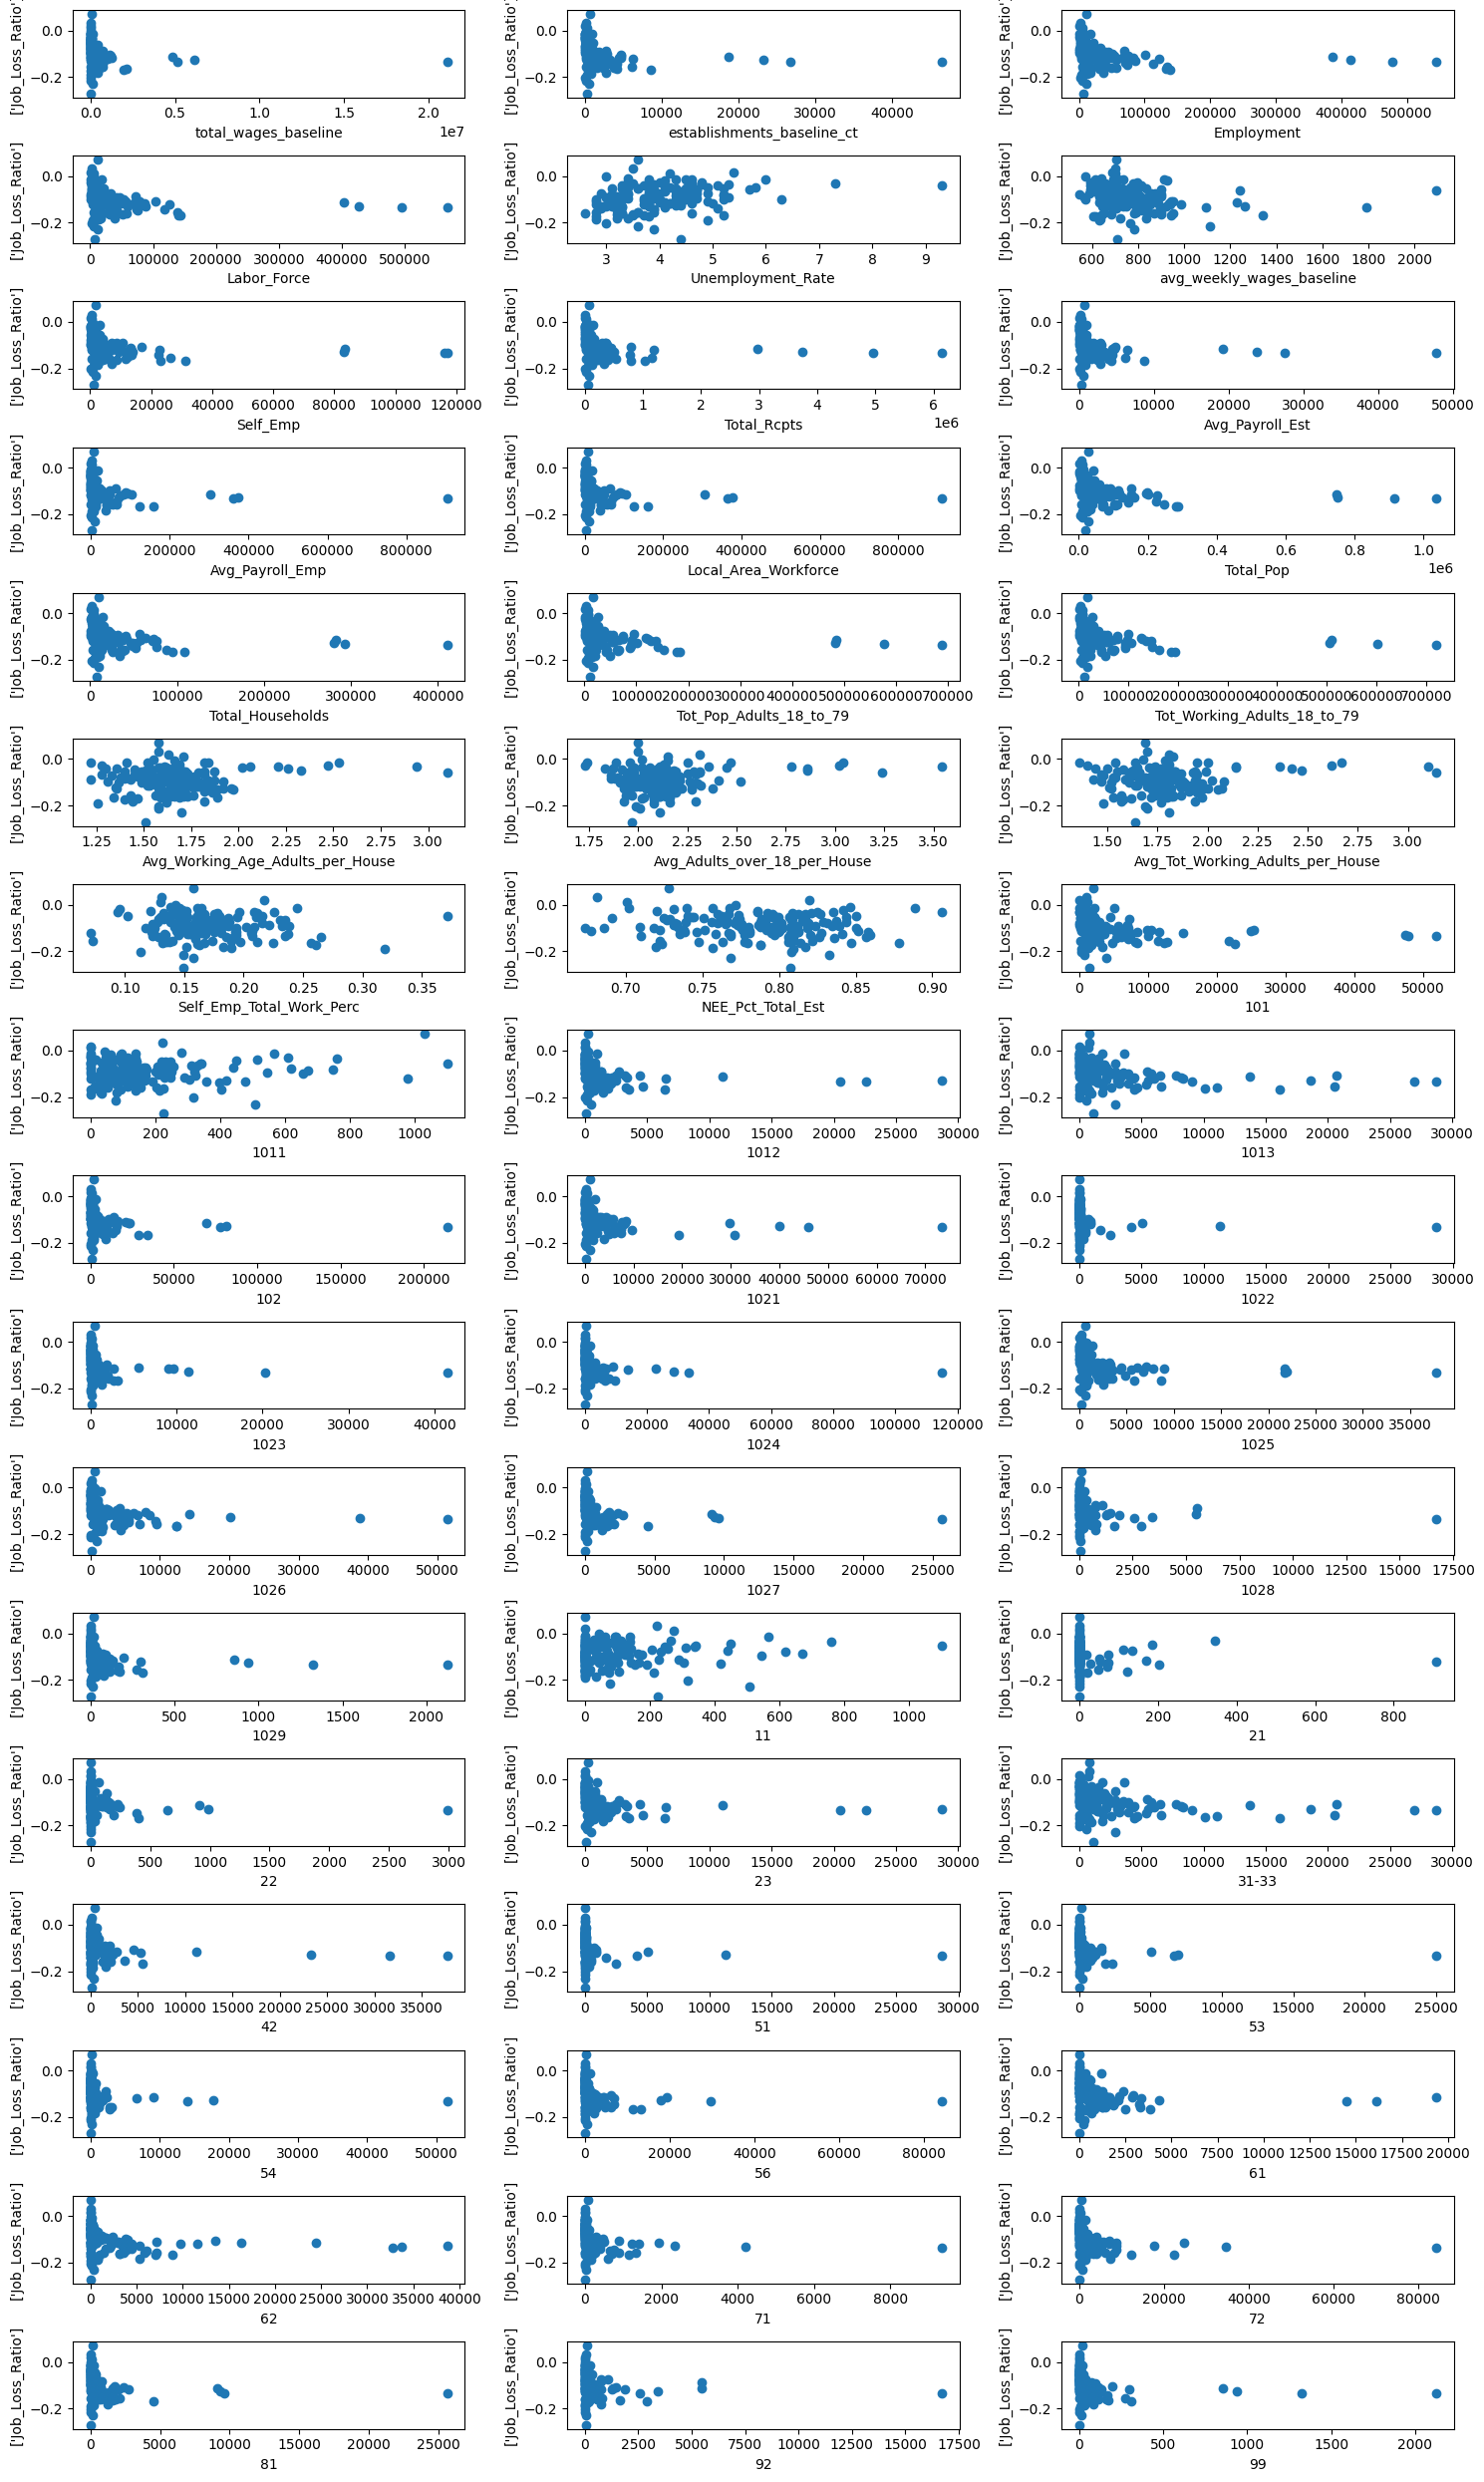

In [15]:
#testing correlations against total jobs lost 

nrows = int(np.ceil(len(x_vars) / 3))
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 25))
axes = axes.ravel()

# plot each x variable against the y variable in a different subplot
for i, x_var in enumerate(x_vars):
    axes[i].scatter(labor[x_var], labor[y_var1])
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var1)

# remove unused subplots
for i in range(len(x_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

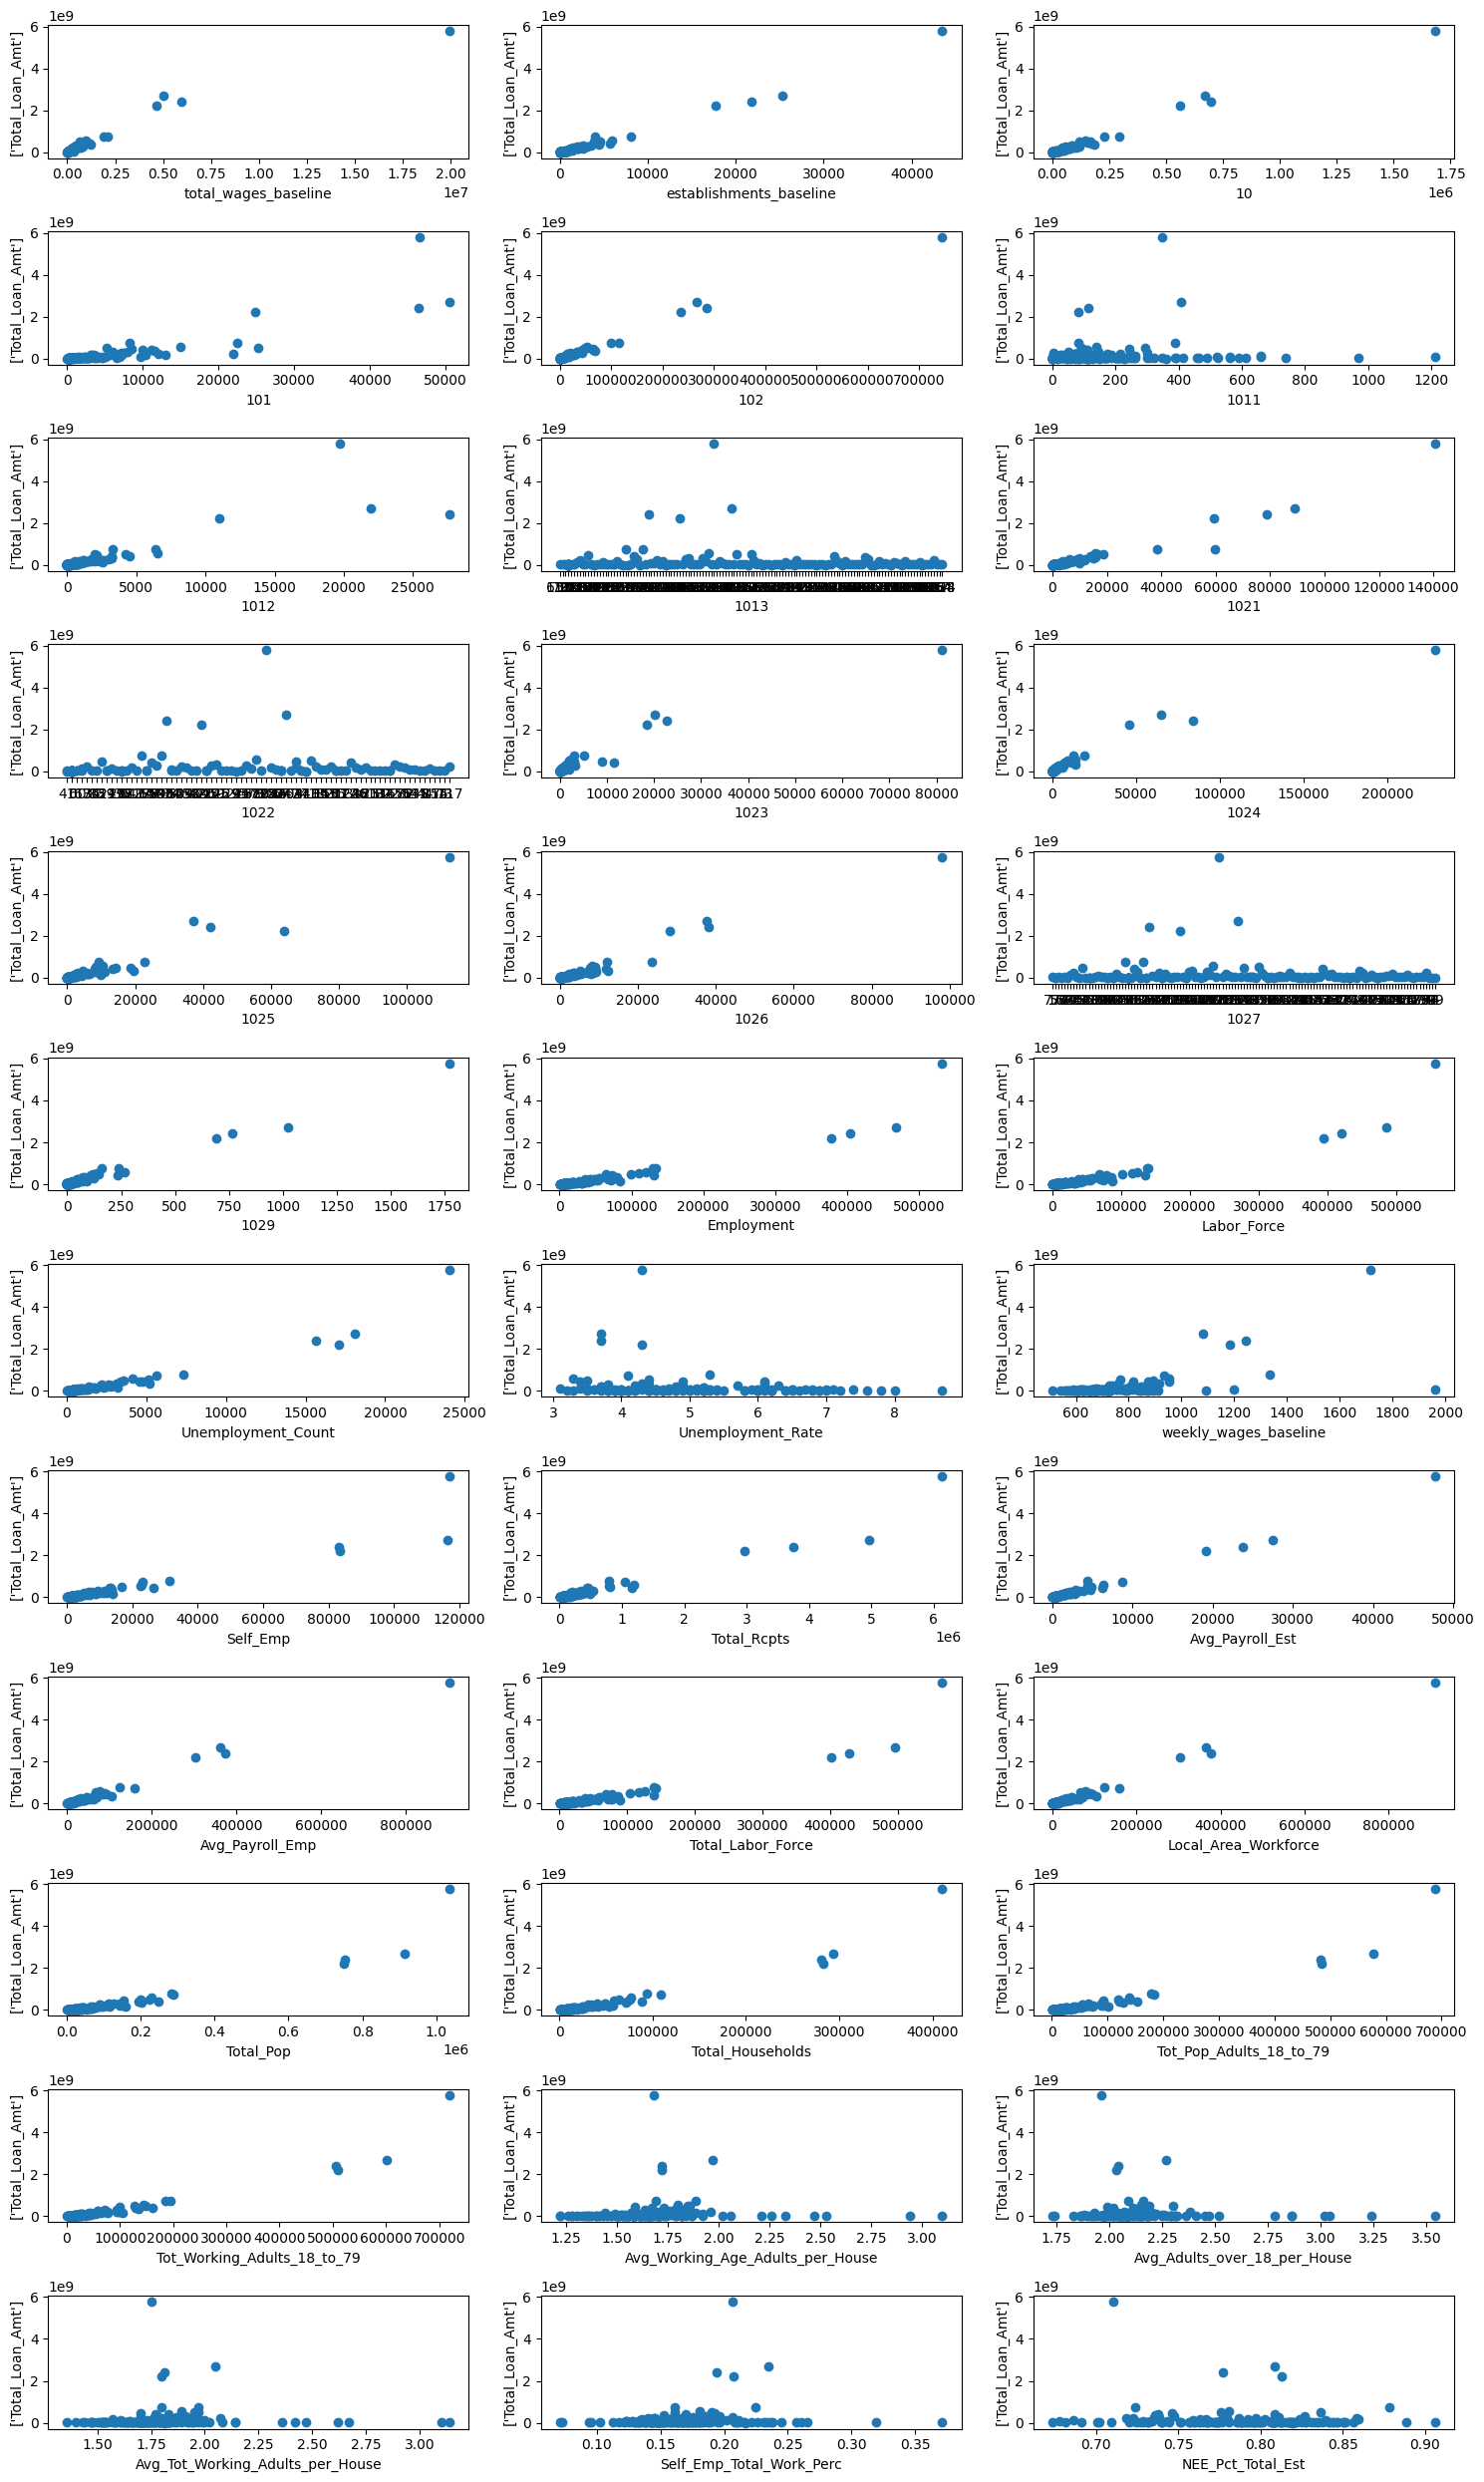

In [9]:
#testing correlations of factors against total PPP loan amounts

nrows = int(np.ceil(len(x_vars) / 3))
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 25))
axes = axes.ravel()

# plot each x variable against the y variable in a different subplot
for i, x_var in enumerate(x_vars):
    axes[i].scatter(labor[x_var], labor[y_var3])
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var3)

# remove unused subplots
for i in range(len(x_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [11]:
time_series = pd.read_csv(
    open(
        r'C:\Users\cmgas\OneDrive\Business_Practicum\labor_time_series.csv', 'rb'),
)

In [12]:
profile2 = ProfileReport(time_series, title="Labor Time Series Data Report")

In [13]:
profile2.to_file('Labor_Time_Series_Report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 24.49it/s]
